# SPAM EMAIL CLASSIFICATION

In [1]:
import numpy as np #for performing mathematical operations on numerical array
import pandas as pd #for uplpoading dataset in a dataframe module to perform ML algo(s)
import nltk #Natural Language Toolkit is open-source module
import re #regular expression for pattern matching
from nltk.corpus import stopwords #importing stopword modules for removing common words
from nltk.stem.porter import PorterStemmer #importing Module for Stemming purposes
from sklearn.model_selection import train_test_split #training_testing spliting
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF vectorizer module
from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.naive_bayes import MultinomialNB #Multinomial Regression Model
from sklearn.metrics import confusion_matrix #for printing the confusion matrix
from sklearn.metrics import accuracy_score #for printing the accuracy score
from sklearn.preprocessing import LabelEncoder #for label encoding the data
#nltk.download('stopwords')

### Dataset into the dataframe

In [2]:
df=pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.isnull().values.any() #There are no null values in the dataset

False

In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.shape

(5572, 2)

### Selecting Dependent and Independent Variables

In [8]:
X = df['Message'] #independent variable
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [9]:
Y = np.where(df['Category']=='ham', 0,1) #dependant variable
Y

array([0, 0, 1, ..., 0, 0, 0])

### Data Cleaning and PreProcesssing

In [10]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0, len(X)):
    sentence = re.sub('[^a-zA-Z]', ' ', X[i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    corpus.append(sentence)   

### Creating TF-IDF (term frequency-inverse document frequency) model for the text data feature selection (vectorization)

In [11]:
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus)

Appling Logistic Regression Model in the data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [13]:
X_train[:5]

<5x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [14]:
Logistic_Model= LogisticRegression().fit(X_train,Y_train)
Y_pred_logi=Logistic_Model.predict(X_test)

In [15]:
confusion_matrix_Logistic = confusion_matrix(Y_test, Y_pred_logi)
accuracy_Logistic = accuracy_score(Y_test, Y_pred_logi)
print(confusion_matrix_Logistic)
print(accuracy_Logistic*100)

[[958   7]
 [ 35 115]]
96.23318385650225


### Appling Naïve Bayes Model in the data

In [16]:
Naive_Model= MultinomialNB().fit(X_train,Y_train)
Y_pred_naive=Naive_Model.predict(X_test)

In [17]:
confusion_matrix_Logistic = confusion_matrix(Y_test, Y_pred_naive)
accuracy_Logistic = accuracy_score(Y_test, Y_pred_naive)
print(confusion_matrix_Logistic)
print(accuracy_Logistic*100)

[[964   1]
 [ 22 128]]
97.9372197309417


In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred_naive))
print(classification_report(Y_test,Y_pred_naive, digits=6))


Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0   0.977688  0.998964  0.988211       965
           1   0.992248  0.853333  0.917563       150

    accuracy                       0.979372      1115
   macro avg   0.984968  0.926149  0.952887      1115
weighted avg   0.979646  0.979372  0.978707      1115



### Applying Decision Tree Classifier with entropy criterion

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
from sklearn import tree

[Text(0.5, 0.875, 'X[655] <= 0.092\nentropy = 0.568\nsamples = 4457\nvalue = [3860, 597]'),
 Text(0.25, 0.625, 'X[4401] <= 0.06\nentropy = 0.407\nsamples = 3993\nvalue = [3668, 325]'),
 Text(0.125, 0.375, 'X[4126] <= 0.114\nentropy = 0.299\nsamples = 3863\nvalue = [3658, 205]'),
 Text(0.0625, 0.125, 'entropy = 0.236\nsamples = 3743\nvalue = [3598, 145]'),
 Text(0.1875, 0.125, 'entropy = 1.0\nsamples = 120\nvalue = [60, 60]'),
 Text(0.375, 0.375, 'X[4401] <= 0.187\nentropy = 0.391\nsamples = 130\nvalue = [10, 120]'),
 Text(0.3125, 0.125, 'entropy = 0.087\nsamples = 91\nvalue = [1, 90]'),
 Text(0.4375, 0.125, 'entropy = 0.779\nsamples = 39\nvalue = [9, 30]'),
 Text(0.75, 0.625, 'X[655] <= 0.183\nentropy = 0.978\nsamples = 464\nvalue = [192, 272]'),
 Text(0.625, 0.375, 'X[756] <= 0.085\nentropy = 0.739\nsamples = 268\nvalue = [56, 212]'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamples = 213\nvalue = [56, 157]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0

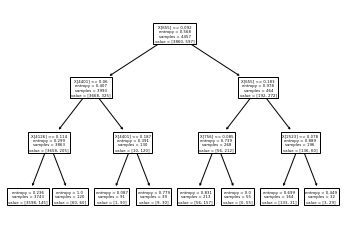

In [21]:
tree.plot_tree(DT_model) #PLoting the tree of Dt

In [22]:
Y_pred_DT=DT_model.predict(X_test)
confusion_matrix_DT = confusion_matrix(Y_test, Y_pred_DT)
accuracy_DT = accuracy_score(Y_test, Y_pred_DT)
print(confusion_matrix_DT)
print(accuracy_DT*100)

[[938  27]
 [ 64  86]]
91.83856502242152


In [23]:
from sklearn.metrics import classification_report
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred_DT))
print(classification_report(Y_test,Y_pred_DT, digits=6))


Accuracy: 0.9183856502242153
              precision    recall  f1-score   support

           0   0.936128  0.972021  0.953737       965
           1   0.761062  0.573333  0.653992       150

    accuracy                       0.918386      1115
   macro avg   0.848595  0.772677  0.803865      1115
weighted avg   0.912576  0.918386  0.913412      1115



### Applying Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [25]:
Y_pred_LR=lg.predict(X_test)
confusion_matrix_LR = confusion_matrix(Y_test, Y_pred_LR)
accuracy_LR = accuracy_score(Y_test, Y_pred_LR)
print(confusion_matrix_LR)
print(accuracy_LR*100)

[[958   7]
 [ 35 115]]
96.23318385650225


In [26]:
from sklearn import metrics

In [27]:
from sklearn.metrics import classification_report
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred_LR))
print(classification_report(Y_test,Y_pred_LR, digits=6))


Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0   0.964753  0.992746  0.978550       965
           1   0.942623  0.766667  0.845588       150

    accuracy                       0.962332      1115
   macro avg   0.953688  0.879706  0.912069      1115
weighted avg   0.961776  0.962332  0.960662      1115



### Predicting User Input is spam/ham By the following 3 models

In [57]:
test1=input("Enter Your String: ") 

Enter Your String: You have been nominated for kbc and you won prize of $1900


In [58]:
s1 = re.sub('[^a-zA-Z]', ' ', test1)
s1 = s1.lower()
s1 = s1.split()
s1 = [stemmer.stem(word) for word in s1 if not word in stopwords.words('english')]
x1=cv.transform(s1)

In [59]:
tnv=Naive_Model.predict(x1)
op=np.sum(tnv)

In [60]:
if op==0:
    print("Ham")
else:
    print("Spam")

Spam
